# Forward Neural Network Training

In [30]:
%matplotlib inline
DATA_DIR = './samples.csv'
eval_samples = [7, 8, 9, 17, 18, 19, 27, 28, 29]  # these samples are retained for model evaluation.


lr = 1e-3  # learning rate
n_epochs = 800  # number of epochs

INPUT_DIM = 3  # dimension of feature
OUTPUT_DIM = 3  # dimension of target
HIDDEN_NUM = 8  # size of hidden layer

## 1. Model Initialization

In [31]:
from model import multiple_layer_perceptron as mlp
import numpy as np

net = mlp.get_model(INPUT_DIM, OUTPUT_DIM, HIDDEN_NUM)  # 3-layer forward neural network

def squared_loss(y_hat, y):
    """ MSE """
    return (y.reshape(y_hat.shape) - y_hat) ** 2 / 2, y.reshape(y_hat.shape) - y_hat

def accuracy(y_hat, y):
    """计算预测正确的数量"""
    _pred_label = np.argmax(y_hat, axis=1)
    _label = np.argmax(y, axis=1)
    return float(np.sum(_pred_label == _label))

## 2. Model Training

In [32]:
from data_util.DataLoader import DataSet, DataLoader
from data_util.Animator import MyAnimator
from train import train_per_epoch, eval_per_epoch

print("start loading validating data ...")
validating_dataset = DataSet(DATA_DIR, eval_sample_idx=eval_samples, split='validate')
validating_data_loader = DataLoader(validating_dataset, shuffle=True)
print("The number of validating data is: %d." % len(validating_dataset))

start loading validating data ...
The number of validating data is: 9.


### (1) Stochastic Backpropagation

In [ ]:
print("start loading training data ...")
training_dataset = DataSet(DATA_DIR, eval_sample_idx=eval_samples, split='train')
training_data_loader = DataLoader(training_dataset, 1, shuffle=True)  # batch_size is set to 1
print("The number of training data is: %d." % len(training_dataset))

animator = MyAnimator(xlabel='epoch', xlim=[1, n_epochs], ylim=[0.2, 1.0],
                        legend=['train accuracy', 'test accuracy'])

for epoch in range(n_epochs):

    train_metrics = train_per_epoch(net, training_data_loader, squared_loss, lr, accuracy)
    eval_metrics = eval_per_epoch(net, validating_data_loader, squared_loss, accuracy)
    if epoch % 5 == 4:
        animator.add(epoch + 1, (train_metrics[1], eval_metrics[1]))
        
print('Training mean loss: %f' % train_metrics[0])
print('Training accuracy: %f' % train_metrics[1])
print('Evaluating mean loss: %f' % eval_metrics[0])
print('Evaluating accuracy: %f\n' % eval_metrics[1])

animator.savefig("../fig/test.pdf")

### (2) Batch Backpropagation

Training mean loss: 0.023933
Training accuracy: 0.952381
Evaluating mean loss: 0.244514
Evaluating accuracy: 0.777778



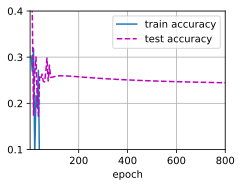

In [38]:
net = mlp.get_model(INPUT_DIM, OUTPUT_DIM, HIDDEN_NUM)  # 3-layer forward neural network

print("start loading training data ...")
training_dataset = DataSet(DATA_DIR, eval_sample_idx=eval_samples, split='train')
training_data_loader = DataLoader(training_dataset, len(training_dataset), shuffle=True)  # batch_size is set to 21
print("The number of training data is: %d." % len(training_dataset))

animator = MyAnimator(xlabel='epoch', xlim=[1, n_epochs], ylim=[0.1, 0.4],
                        legend=['train accuracy', 'test accuracy'])

for epoch in range(n_epochs):

    train_metrics = train_per_epoch(net, training_data_loader, squared_loss, lr, accuracy)
    eval_metrics = eval_per_epoch(net, validating_data_loader, squared_loss, accuracy)
    if epoch % 5 == 4:
        animator.add(epoch + 1, (train_metrics[0], eval_metrics[0]))

print('Training mean loss: %f' % train_metrics[0])
print('Training accuracy: %f' % train_metrics[1])
print('Evaluating mean loss: %f' % eval_metrics[0])
print('Evaluating accuracy: %f\n' % eval_metrics[1])

animator.savefig("../fig/test.pdf")